OLIST SALES ANALYSIS

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
olistbr_brazilian_ecommerce_path = kagglehub.dataset_download('olistbr/brazilian-ecommerce')

print('Data source import complete.')


Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Data source import complete.


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedadelselim","key":"6aafdff1db5a9ed5aa8d405e2ed2ec89"}'}

In [3]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d olistbr/brazilian-ecommerce


Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
  0% 0.00/42.6M [00:00<?, ?B/s]
100% 42.6M/42.6M [00:00<00:00, 1.49GB/s]


In [5]:
!unzip brazilian-ecommerce.zip -d olist_dataset


Archive:  brazilian-ecommerce.zip
  inflating: olist_dataset/olist_customers_dataset.csv  
  inflating: olist_dataset/olist_geolocation_dataset.csv  
  inflating: olist_dataset/olist_order_items_dataset.csv  
  inflating: olist_dataset/olist_order_payments_dataset.csv  
  inflating: olist_dataset/olist_order_reviews_dataset.csv  
  inflating: olist_dataset/olist_orders_dataset.csv  
  inflating: olist_dataset/olist_products_dataset.csv  
  inflating: olist_dataset/olist_sellers_dataset.csv  
  inflating: olist_dataset/product_category_name_translation.csv  


In [ ]:
import pandas as pd
import os


os.listdir('/content/olist_dataset')



['olist_order_payments_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_geolocation_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

In [7]:
orders = pd.read_csv('/content/olist_dataset/olist_orders_dataset.csv')
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
customers = pd.read_csv('/content/olist_dataset/olist_customers_dataset.csv')
order_items = pd.read_csv('/content/olist_dataset/olist_order_items_dataset.csv')
products = pd.read_csv('/content/olist_dataset/olist_products_dataset.csv')
sellers = pd.read_csv('/content/olist_dataset/olist_sellers_dataset.csv')

#  join
merged = orders.merge(customers, on='customer_id', how='left')
merged.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display all columns
pd.set_option('display.max_columns', None)

In [11]:
# Load all 9 CSV files
customers_df = pd.read_csv('/content/olist_dataset/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('/content/olist_dataset/olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('/content/olist_dataset/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('/content/olist_dataset/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('/content/olist_dataset/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('/content/olist_dataset/olist_orders_dataset.csv')
products_df = pd.read_csv('/content/olist_dataset/olist_products_dataset.csv')
category_translation_df = pd.read_csv('/content/olist_dataset/product_category_name_translation.csv')
sellers_df = pd.read_csv('/content/olist_dataset/olist_sellers_dataset.csv')

# Create a function to inspect datasets
def inspect_dataset(df, name):
    print(f"=== {name} ===")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Null values:\n{df.isnull().sum()}")
    print(f"Data types:\n{df.dtypes}")
    print("\n" + "="*50 + "\n")

# Inspect all datasets
datasets = {
    'Customers': customers_df,
    'Geolocation': geolocation_df,
    'Order Items': order_items_df,
    'Order Payments': order_payments_df,
    'Order Reviews': order_reviews_df,
    'Orders': orders_df,
    'Products': products_df,
    'Category Translation': category_translation_df,
    'Sellers': sellers_df
}

for name, df in datasets.items():
    inspect_dataset(df, name)

# Print sample summaries for key tables
print("=== ORDERS SAMPLE ===")
print(orders_df.head())
print("\n=== ORDER ITEMS SAMPLE ===")
print(order_items_df.head())
print("\n=== PAYMENTS SAMPLE ===")
print(order_payments_df.head())

=== Customers ===
Shape: (99441, 5)
Columns: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
Null values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Data types:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


=== Geolocation ===
Shape: (1000163, 5)
Columns: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
Null values:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Data types:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                flo

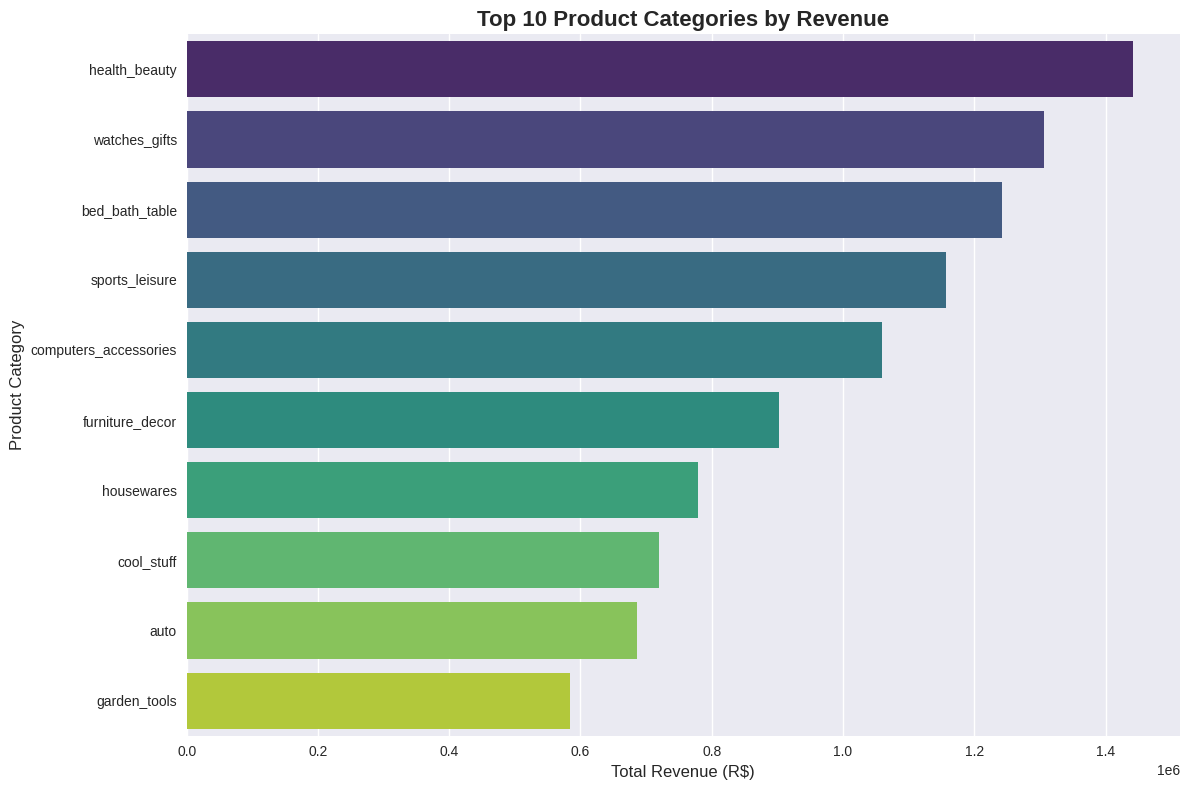

Top 10 Categories by Revenue:
product_category_name_english
health_beauty            1441248.07
watches_gifts            1305541.61
bed_bath_table           1241681.72
sports_leisure           1156656.48
computers_accessories    1059272.40
furniture_decor           902511.79
housewares                778397.77
cool_stuff                719329.95
auto                      685384.32
garden_tools              584219.21
Name: total_price, dtype: float64


In [12]:
# Create total_price column
order_items_df['total_price'] = order_items_df['price'] + order_items_df['freight_value']

# Merge with products and category translation
products_with_category = products_df.merge(
    category_translation_df,
    on='product_category_name',
    how='left'
)

# Merge order items with products
order_items_with_products = order_items_df.merge(
    products_with_category,
    on='product_id',
    how='left'
)

# Revenue by category
revenue_by_category = order_items_with_products.groupby('product_category_name_english')['total_price'].sum().sort_values(ascending=False)

# Plot top 10 categories by revenue
plt.figure(figsize=(12, 8))
top_10_categories = revenue_by_category.head(10)
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title('Top 10 Product Categories by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue (R$)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

print("Top 10 Categories by Revenue:")
print(top_10_categories)

In [13]:
# Merge orders with order_items
order_summary = orders_df.merge(
    order_items_df.groupby('order_id').agg({
        'total_price': 'sum',
        'freight_value': 'sum',
        'price': 'sum'
    }).reset_index(),
    on='order_id',
    how='inner'
)

# Rename columns for clarity
order_summary = order_summary.rename(columns={
    'total_price': 'order_total_value',
    'freight_value': 'order_freight_cost',
    'price': 'order_products_value'
})

print("=== ORDER SUMMARY SAMPLE ===")
print(order_summary[['order_id', 'order_products_value', 'order_freight_cost', 'order_total_value']].head())

print(f"\nAverage Order Value: R$ {order_summary['order_total_value'].mean():.2f}")
print(f"Average Freight Cost: R$ {order_summary['order_freight_cost'].mean():.2f}")
print(f"Total Revenue: R$ {order_summary['order_total_value'].sum():.2f}")

=== ORDER SUMMARY SAMPLE ===
                           order_id  order_products_value  order_freight_cost  \
0  e481f51cbdc54678b7cc49136f2d6af7                 29.99                8.72   
1  53cdb2fc8bc7dce0b6741e2150273451                118.70               22.76   
2  47770eb9100c2d0c44946d9cf07ec65d                159.90               19.22   
3  949d5b44dbf5de918fe9c16f97b45f8a                 45.00               27.20   
4  ad21c59c0840e6cb83a9ceb5573f8159                 19.90                8.72   

   order_total_value  
0              38.71  
1             141.46  
2             179.12  
3              72.20  
4              28.62  

Average Order Value: R$ 160.58
Average Freight Cost: R$ 22.82
Total Revenue: R$ 15843553.24


Average Delivery Time: 12.1 days


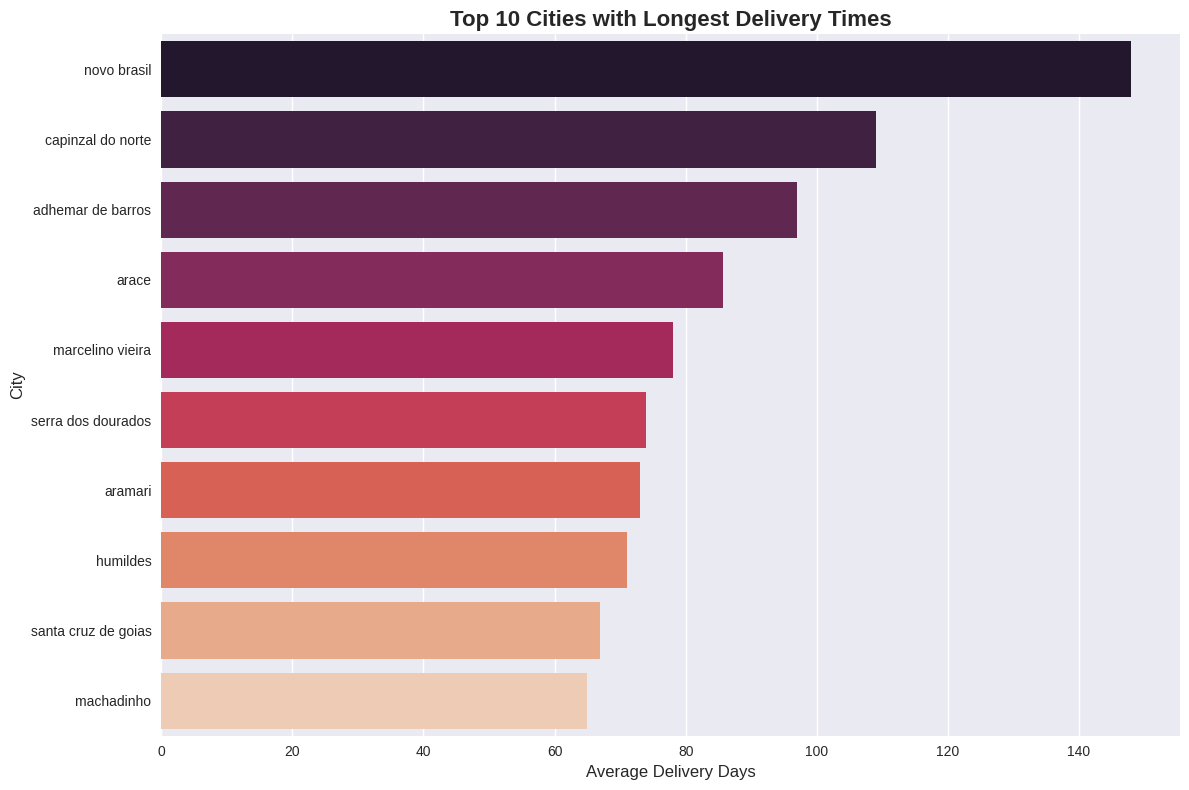

In [14]:
# Convert date columns to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Calculate delivery time
orders_df['delivery_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# Average delivery time
avg_delivery_time = orders_df['delivery_days'].mean()
print(f"Average Delivery Time: {avg_delivery_time:.1f} days")

# Merge with customers to get city information
delivery_by_city = orders_df.merge(customers_df, on='customer_id', how='inner')

# Top 10 cities with longest delivery times
city_delivery_times = delivery_by_city.groupby('customer_city')['delivery_days'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=city_delivery_times.values, y=city_delivery_times.index, palette='rocket')
plt.title('Top 10 Cities with Longest Delivery Times', fontsize=16, fontweight='bold')
plt.xlabel('Average Delivery Days', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.tight_layout()
plt.show()

Repeat Customer Rate: 0.00%
Total Customers: 99441
Repeat Customers: 0


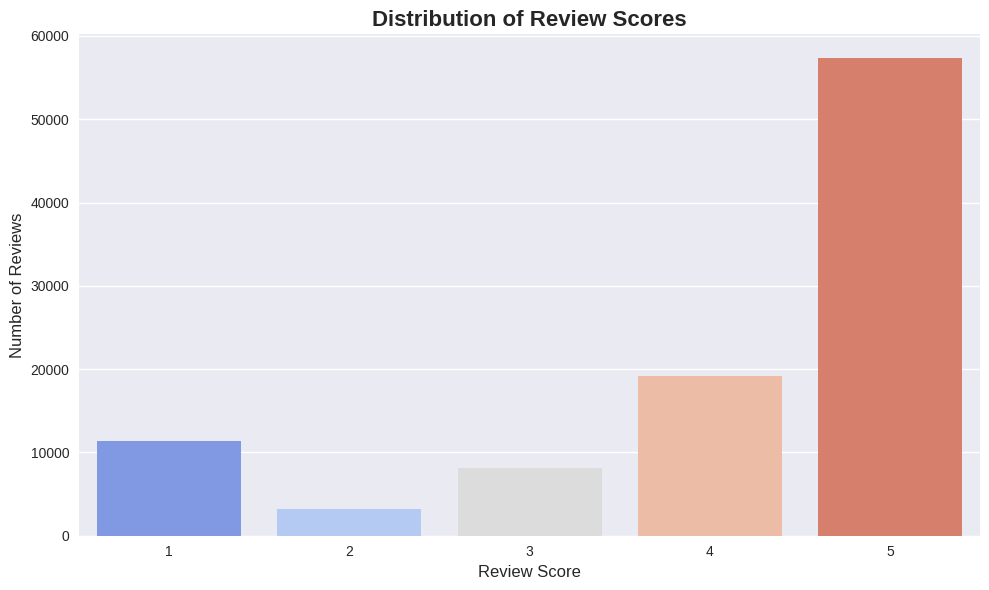


Review Score Distribution (%):
review_score
1    11.513344
2     3.175643
3     8.242965
4    19.291704
5    57.776344
Name: proportion, dtype: float64


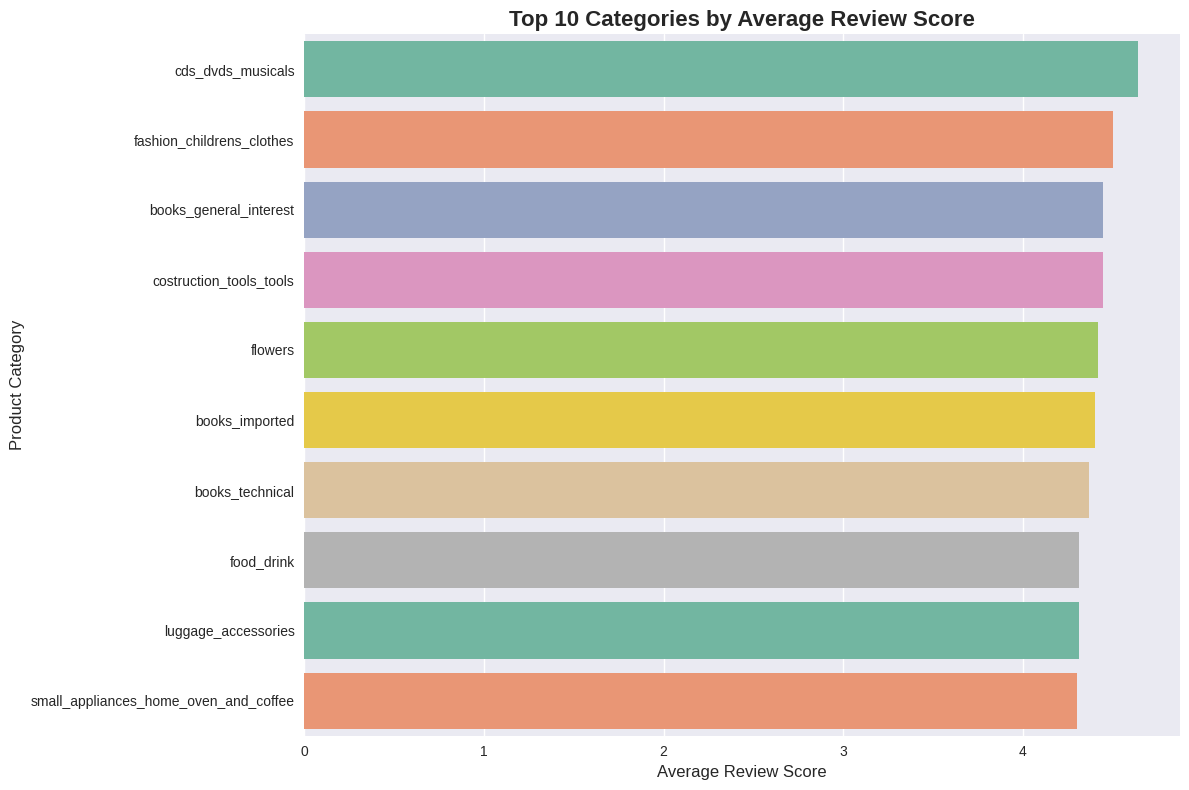

In [15]:
# Repeat customer rate
customer_order_counts = orders_df['customer_id'].value_counts()
repeat_customers = (customer_order_counts > 1).sum()
total_customers = len(customer_order_counts)
repeat_customer_rate = (repeat_customers / total_customers) * 100

print(f"Repeat Customer Rate: {repeat_customer_rate:.2f}%")
print(f"Total Customers: {total_customers}")
print(f"Repeat Customers: {repeat_customers}")

# Review score distribution
plt.figure(figsize=(10, 6))
review_distribution = order_reviews_df['review_score'].value_counts().sort_index()
sns.barplot(x=review_distribution.index, y=review_distribution.values, palette='coolwarm')
plt.title('Distribution of Review Scores', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Review score distribution in percentage
review_percentage = (order_reviews_df['review_score'].value_counts(normalize=True) * 100).sort_index()
print("\nReview Score Distribution (%):")
print(review_percentage)

# Average review score by product category
reviews_with_products = order_reviews_df.merge(
    orders_df[['order_id', 'customer_id']],
    on='order_id',
    how='inner'
).merge(
    order_items_df[['order_id', 'product_id']],
    on='order_id',
    how='inner'
).merge(
    products_with_category[['product_id', 'product_category_name_english']],
    on='product_id',
    how='inner'
)

avg_review_by_category = reviews_with_products.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_review_by_category.values, y=avg_review_by_category.index, palette='Set2')
plt.title('Top 10 Categories by Average Review Score', fontsize=16, fontweight='bold')
plt.xlabel('Average Review Score', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

=== PAYMENT SUMMARY ===
              total_payment_value  avg_payment_value  avg_installments  \
payment_type                                                             
credit_card           12542084.19             163.32              3.51   
boleto                 2869361.27             145.03              1.00   
voucher                 379436.87              65.70              1.00   
debit_card              217989.79             142.57              1.00   
not_defined                  0.00               0.00              1.00   

              order_count  
payment_type               
credit_card         76795  
boleto              19784  
voucher              5775  
debit_card           1529  
not_defined             3  


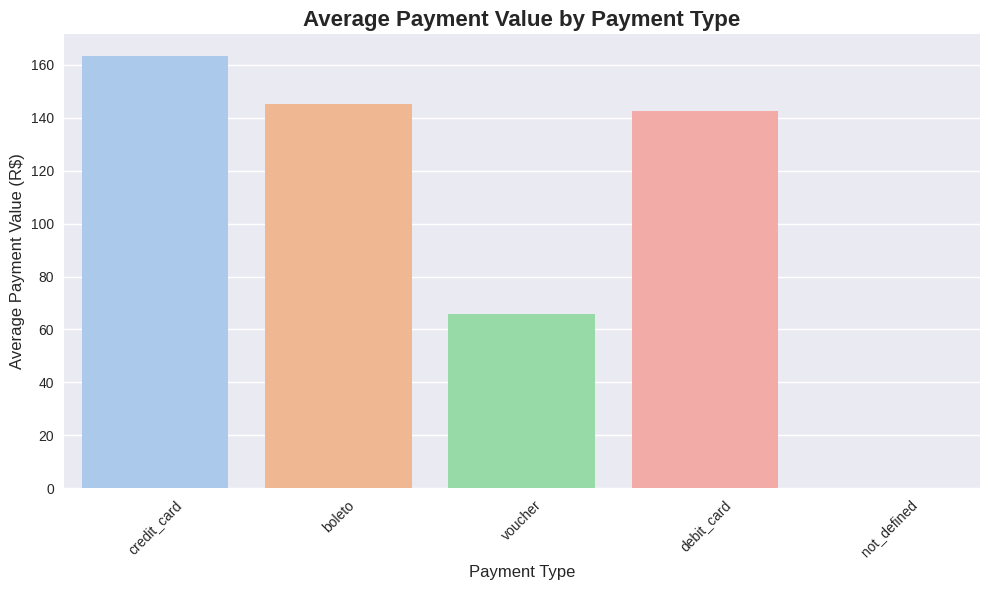

In [16]:
# Payment type analysis
payment_summary = order_payments_df.groupby('payment_type').agg({
    'payment_value': ['sum', 'mean'],
    'payment_installments': 'mean',
    'order_id': 'count'
}).round(2)

payment_summary.columns = ['total_payment_value', 'avg_payment_value', 'avg_installments', 'order_count']
payment_summary = payment_summary.sort_values('total_payment_value', ascending=False)

print("=== PAYMENT SUMMARY ===")
print(payment_summary)

# Visualize average payment per order by payment type
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_summary.index, y=payment_summary['avg_payment_value'], palette='pastel')
plt.title('Average Payment Value by Payment Type', fontsize=16, fontweight='bold')
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Average Payment Value (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

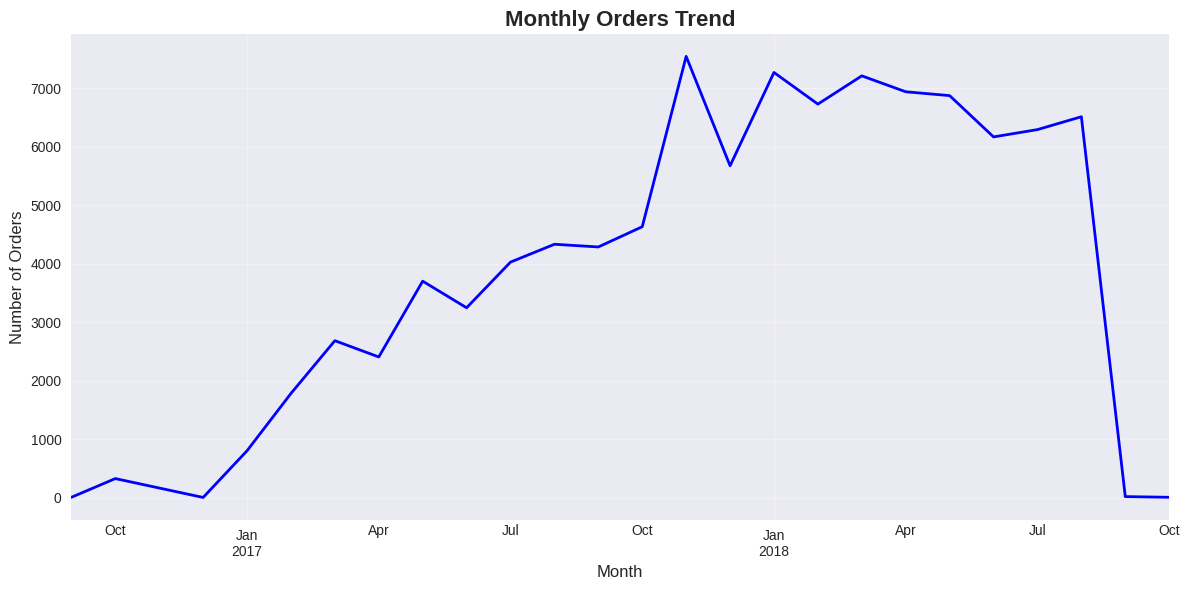

=== REVENUE BY YEAR ===
order_purchase_year
2016      57183.21
2017    7142672.43
2018    8643697.60
Name: total_price, dtype: float64


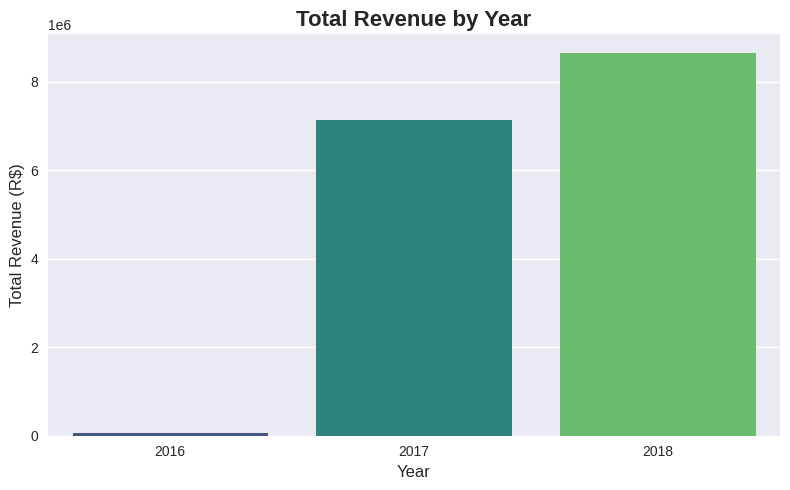

In [17]:
# Extract year and month from order dates
orders_df['order_purchase_year'] = orders_df['order_purchase_timestamp'].dt.year
orders_df['order_purchase_month'] = orders_df['order_purchase_timestamp'].dt.month
orders_df['order_purchase_year_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Number of orders per month
monthly_orders = orders_df.groupby('order_purchase_year_month').size()

# Plot monthly orders trend
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', color='blue', linewidth=2)
plt.title('Monthly Orders Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Revenue per year
orders_with_revenue = orders_df.merge(
    order_items_df.groupby('order_id')['total_price'].sum().reset_index(),
    on='order_id',
    how='inner'
)

revenue_by_year = orders_with_revenue.groupby('order_purchase_year')['total_price'].sum()

print("=== REVENUE BY YEAR ===")
print(revenue_by_year)

# Visualize revenue by year
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_year.index, y=revenue_by_year.values, palette='viridis')
plt.title('Total Revenue by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue (R$)', fontsize=12)
plt.tight_layout()
plt.show()

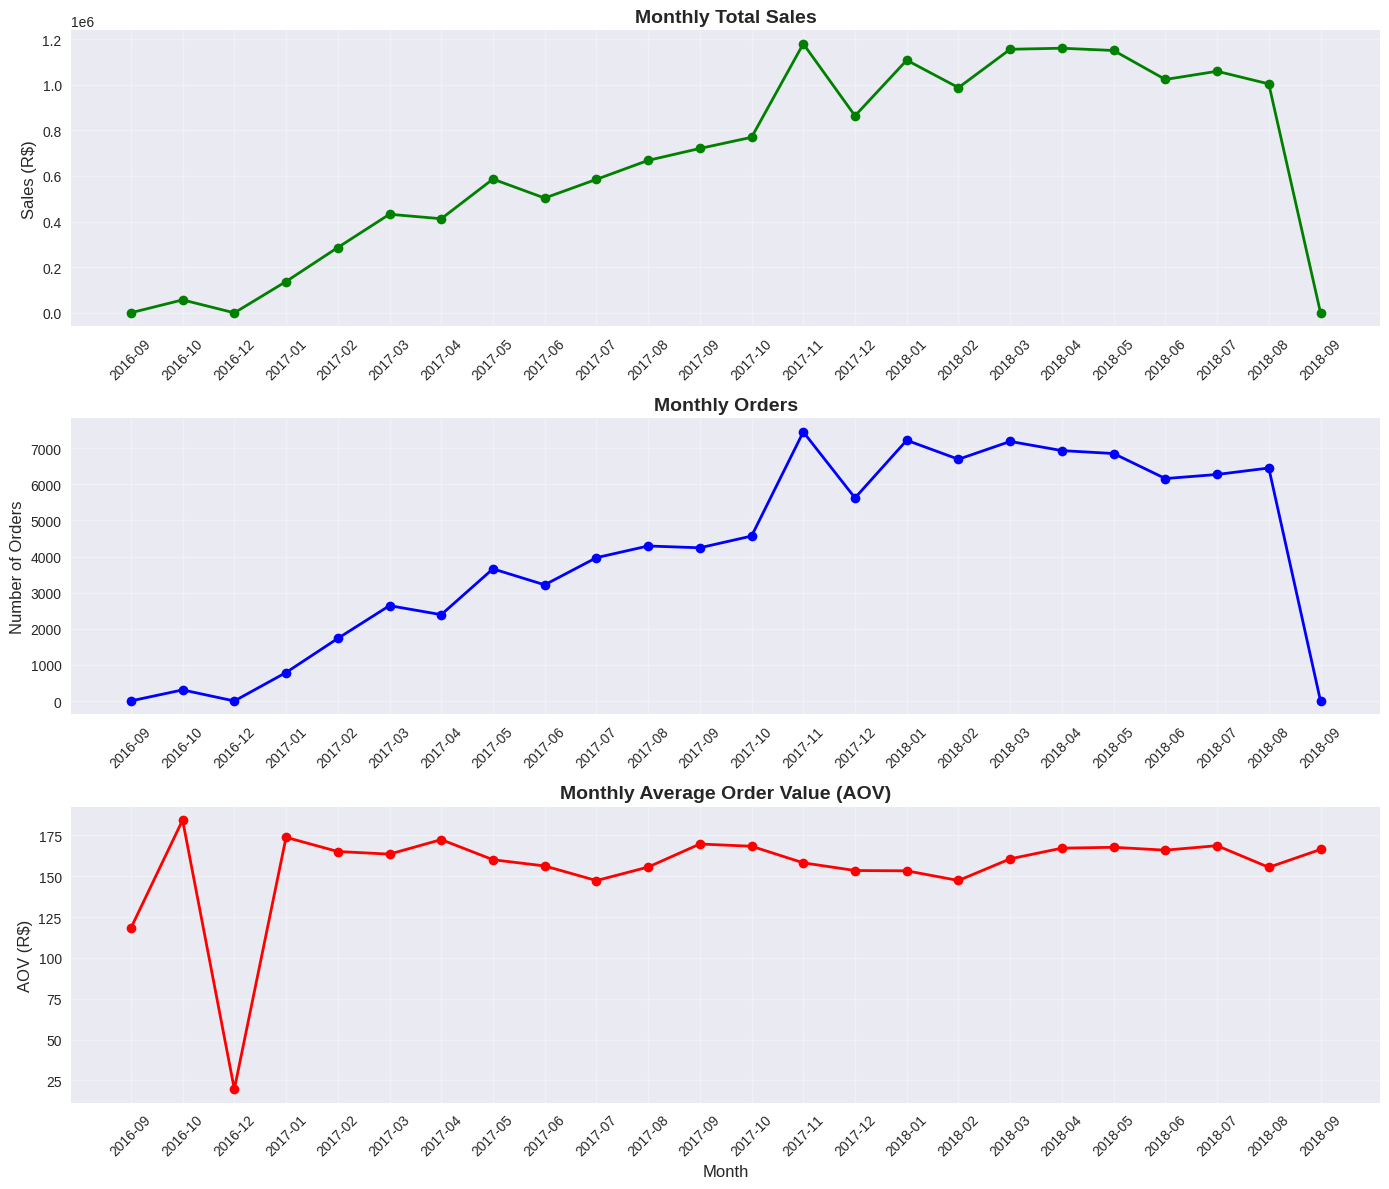

=== MONTHLY SUMMARY SAMPLE ===
  year_month  total_sales  total_orders         aov year_month_str
0    2016-09       354.75             3  118.250000        2016-09
1    2016-10     56808.84           308  184.444286        2016-10
2    2016-12        19.62             1   19.620000        2016-12
3    2017-01    137188.49           789  173.876413        2017-01
4    2017-02    286280.62          1733  165.193664        2017-02


In [18]:
# Create monthly summary
monthly_summary = orders_with_revenue.groupby('order_purchase_year_month').agg({
    'total_price': 'sum',
    'order_id': 'count'
}).reset_index()

monthly_summary.columns = ['year_month', 'total_sales', 'total_orders']
monthly_summary['aov'] = monthly_summary['total_sales'] / monthly_summary['total_orders']

# Convert year_month to string for plotting
monthly_summary['year_month_str'] = monthly_summary['year_month'].astype(str)

# Plot all 3 trends
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Monthly Total Sales
axes[0].plot(monthly_summary['year_month_str'], monthly_summary['total_sales'], color='green', linewidth=2, marker='o')
axes[0].set_title('Monthly Total Sales', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sales (R$)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Monthly Orders
axes[1].plot(monthly_summary['year_month_str'], monthly_summary['total_orders'], color='blue', linewidth=2, marker='o')
axes[1].set_title('Monthly Orders', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Orders', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Monthly Average Order Value
axes[2].plot(monthly_summary['year_month_str'], monthly_summary['aov'], color='red', linewidth=2, marker='o')
axes[2].set_title('Monthly Average Order Value (AOV)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('AOV (R$)', fontsize=12)
axes[2].set_xlabel('Month', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== MONTHLY SUMMARY SAMPLE ===")
print(monthly_summary.head())

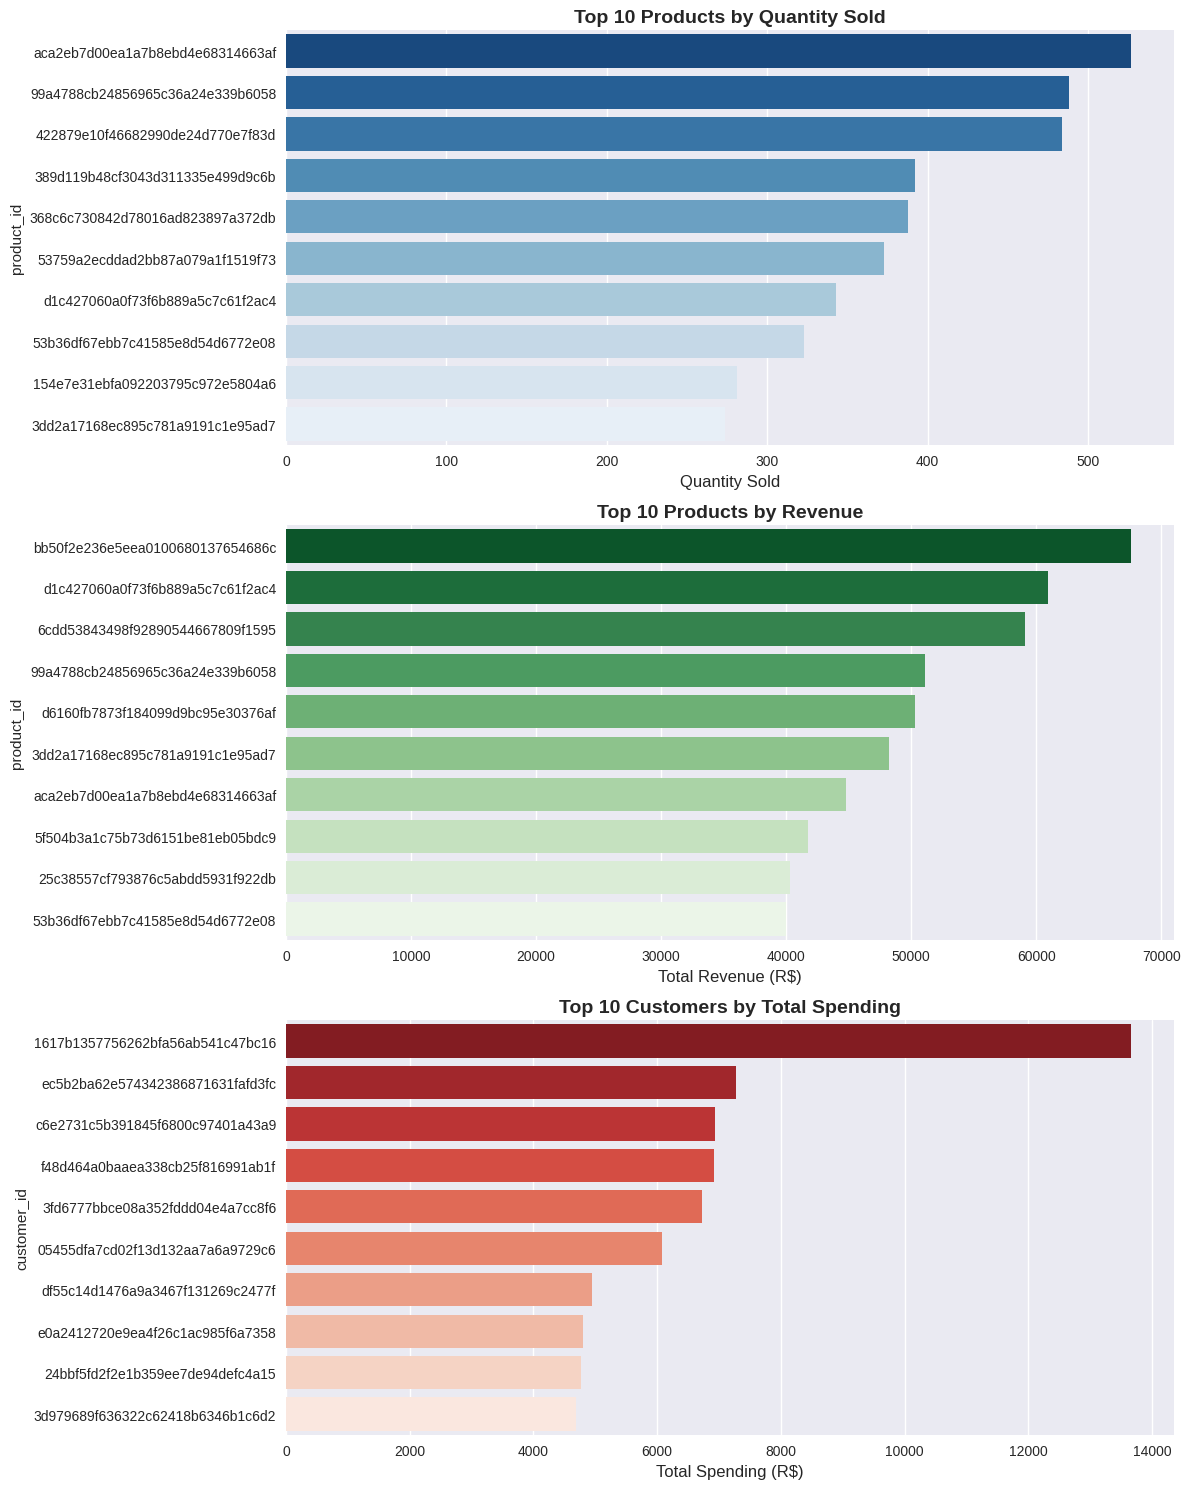

In [19]:
# Top 10 Products by Quantity
top_products_quantity = order_items_df.groupby('product_id')['order_item_id'].count().sort_values(ascending=False).head(10)

# Top 10 Products by Revenue
top_products_revenue = order_items_df.groupby('product_id')['total_price'].sum().sort_values(ascending=False).head(10)

# Top 10 Customers by Total Spending
customer_spending = orders_with_revenue.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Top 10 Products by Quantity
sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index, ax=axes[0], palette='Blues_r')
axes[0].set_title('Top 10 Products by Quantity Sold', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quantity Sold', fontsize=12)

# Top 10 Products by Revenue
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, ax=axes[1], palette='Greens_r')
axes[1].set_title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Revenue (R$)', fontsize=12)

# Top 10 Customers by Spending
sns.barplot(x=customer_spending.values, y=customer_spending.index, ax=axes[2], palette='Reds_r')
axes[2].set_title('Top 10 Customers by Total Spending', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Total Spending (R$)', fontsize=12)

plt.tight_layout()
plt.show()

=== DELIVERY STATUS ===
delivery_status
On Time    91614
Late        7827
Name: count, dtype: int64


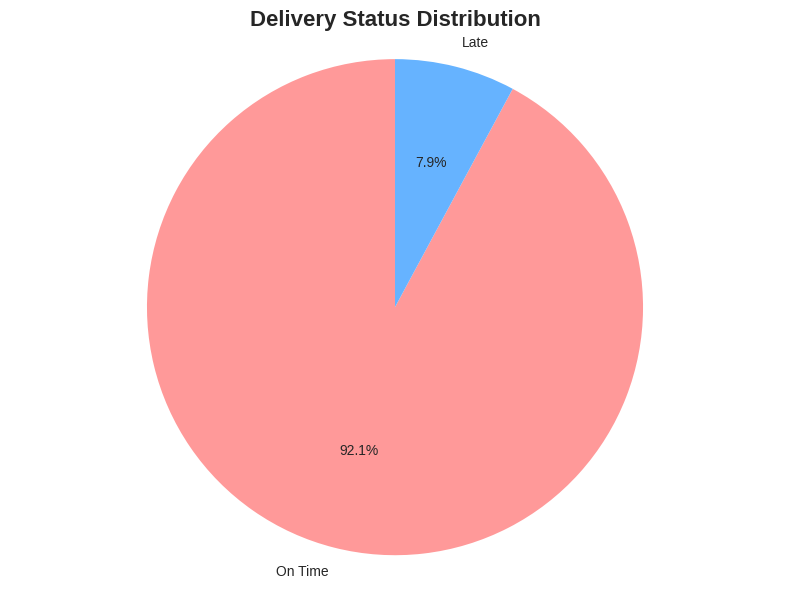


Late Delivery Rate: 7.87%


In [20]:
# Convert estimated delivery date to datetime
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Create delivery status
orders_df['delivery_status'] = np.where(
    orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date'],
    'Late',
    'On Time'
)

# Count late vs on-time orders
delivery_status_counts = orders_df['delivery_status'].value_counts()

print("=== DELIVERY STATUS ===")
print(delivery_status_counts)

# Plot delivery status
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff']
plt.pie(delivery_status_counts.values, labels=delivery_status_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Delivery Status Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Calculate late delivery rate
late_delivery_rate = (delivery_status_counts['Late'] / delivery_status_counts.sum()) * 100
print(f"\nLate Delivery Rate: {late_delivery_rate:.2f}%")